# Домашнее задание 2. Модели предсказания


Каткова Дарья, ИУ6-22М

### Цель работы

Приобрести опыт решения практических задач по машинному обучению, таких как анализ и визуализация исходных данных, обучение, выбор и оценка качества моделей предсказания, посредством языка программирования Python.

При выполнении работы решаются следующие задачи:

- реализация собственных классов совместимых с библиотекой sklearn
- оценка влияния регуляризации в моделях предсказания
- преобразование исходных данных посредством транформаторов sklearn
- использование отложенной выборки и кросс-валидации
- выбор гиперпараметров и интерпретация кривых обучения
- оценка качества моделей предсказания
- выявление преимуществ и недостатков методов предсказания в зависимости от поставленной задачи

### Вариант: 1-3

In [1]:
surname = "Каткова"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 55,  1, 44, 26, 18, 3, 38, 26, 18, 12,  3, 49, 45,
        7, 42, 9,  4,  3, 36, 33, 31, 29,  5, 4,  4, 19, 21, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задание № 2. Вариант: ", variant % 2 + 1)
print("Задание № 3. Вариант: ", variant % 3 + 1 )

Задание № 2. Вариант:  1
Задание № 3. Вариант:  3


## Задание 1. Реализация собственных классов и функций

### Замечание
1) нельзя пользоваться готовыми реализациями sklearn; 
2) чтобы избежать случая с вырожденной матрицей при оценке параметров добавьте незначительную регуляризацию по умолчанию или используйте lstsq из пакета numpy или др. способ; 
3) используйте random_state=0.

### 1. Реализуйте класс, предназначенный для оценки параметров линейной регрессии с регуляризацией совместимый с sklearn. 

### Передаваемые параметры: 
1) коэффициент регуляризации (alpha). Использовать метод наименьших квадратов с регуляризацией.

In [2]:
# Подключаем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Создаем dataframe
df = pd.read_csv("regularization.csv")

# Выводим десять строк, начиная с головы
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,3.856603,14.873388,57.360757,221.217682,853.148822,3290.256492,1.268921e+04,4.893726e+04,1.887316e+05,7.278629e+05,2.807078e+06,1.082579e+07,4.175077e+07,1.610161e+08,6.209754e+08,2.394856e+09,9.209759
1,0.103760,0.010766,0.001117,0.000116,0.000012,0.000001,1.294799e-07,1.343480e-08,1.393992e-09,1.446402e-10,1.500783e-11,1.557209e-12,1.615756e-13,1.676504e-14,1.739537e-15,1.804939e-16,10.409240
2,3.168241,10.037752,31.802020,100.756468,319.220791,1011.368453,3.204259e+03,1.015187e+04,3.216356e+04,1.019019e+05,3.228498e+05,1.022866e+06,3.240687e+06,1.026728e+07,3.252921e+07,1.030604e+08,7.643742
3,3.744019,14.017681,52.482471,196.495391,735.682558,2754.409777,1.031256e+04,3.861044e+04,1.445582e+05,5.412288e+05,2.026371e+06,7.586773e+06,2.840503e+07,1.063490e+08,3.981726e+08,1.490766e+09,8.453341
4,2.492535,6.212731,15.485450,38.598027,96.206935,239.799159,5.977078e+02,1.489808e+03,3.713398e+03,9.255774e+03,2.307034e+04,5.750364e+04,1.433298e+05,3.572546e+05,8.904697e+05,2.219527e+06,9.317824
5,1.123983,1.263338,1.419971,1.596024,1.793904,2.016318,2.266307e+00,2.547291e+00,2.863113e+00,3.218091e+00,3.617080e+00,4.065537e+00,4.569596e+00,5.136149e+00,5.772946e+00,6.488694e+00,9.882790
6,0.990314,0.980722,0.971223,0.961817,0.952501,0.943275,9.341388e-01,9.250911e-01,9.161309e-01,9.072576e-01,8.984702e-01,8.897679e-01,8.811499e-01,8.726154e-01,8.641635e-01,8.557935e-01,10.404313
7,3.802654,14.460174,54.987033,209.096635,795.122064,3023.573749,1.149760e+04,4.372140e+04,1.662573e+05,6.322191e+05,2.404110e+06,9.141998e+06,3.476385e+07,1.321949e+08,5.026914e+08,1.911561e+09,8.553478
8,0.845554,0.714962,0.604539,0.511170,0.432222,0.365467,3.090225e-01,2.612953e-01,2.209393e-01,1.868162e-01,1.579632e-01,1.335664e-01,1.129377e-01,9.549490e-02,8.074611e-02,6.827521e-02,10.282581
9,0.441699,0.195098,0.086175,0.038063,0.016813,0.007426,3.280087e-03,1.448812e-03,6.399387e-04,2.826603e-04,1.248508e-04,5.514648e-05,2.435815e-05,1.075897e-05,4.752228e-06,2.099055e-06,10.112354


In [3]:
# Класс для оценки параметров линейной регрессии
class LinearRegression:

    def __init__(self, alpha):
        self.alpha = alpha
    
    # Функция обучения
    def fit(self, X, y):
        index = None
        # Проверка на наличие вектора единиц, если его нет, то добавляем
        for i in range(X.shape[1]):
            if all(X[:, i] == 1):  # Проверяем, что все элементы столбца равны 1
                index = i
            else:
                X = np.insert(X, 0, 1, axis=1)
        # Метод наименьших квадратов
        self.coef_ = np.linalg.inv(X.T @ X + (self.alpha + 1e-10) * np.eye(X.shape[1])) @ X.T @ y
        
    # Функция предсказания
    def predict(self, X):
        index = None
        # Проверка на наличие вектора единиц, если его нет, то добавляем
        for i in range(X.shape[1]):
            if all(X[:, i] == 1):  # Проверяем, что все элементы столбца равны 1
                index = i
            else:
                X = np.insert(X, 0, 1, axis=1)
            
        return X @ self.coef_

### 2. Реализуйте класс для стандартизации признаков в виде трансформации совместимый с sklearn.

### Передаваемые параметры: 
1) has_bias (содержит ли матрица вектор единиц), 
2) apply_mean (производить ли центровку)

In [4]:
# Класс для стандартизации признаков
class Scaler:
    
    def __init__(self, has_bias, apply_mean):
        self.has_bias = has_bias # Cодержит ли матрица вектор единиц
        self.apply_mean = apply_mean # Производить ли центровку
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X , y = None):  
        if self.has_bias:
            # Удаляем вектор единиц
            X = np.delete(X, X.shape[1] - 1, 1)
        
        if self.apply_mean:
            self.mean_ = np.mean(X, axis=0)
            X = X - self.mean_
            
        self.std_ = np.std(X, axis=0)
        
        return self
    
    # Функция преобразования
    def transform(self, X): 
        if self.has_bias:
            # Удаляем вектор единиц
            X = np.delete(X, X.shape[1] - 1, 1)
        
        if self.apply_mean:
            X = X - self.mean_
            
        # Если self.std_ = 0, то заменим на 1, чтобы избежать деления на 0
        temp = self.std_
        temp[temp == 0] = 1
        X = X / temp
        
        # Добавляем вектор единиц
        X = np.insert(X, 0, 1, axis=1)
            
        return X

### 3. Реализуйте функции для расчета MSE и R^2 при отложенной выборке (run_holdout) и кросс-валидации (run_cross_val). Для кросс-валидации используйте только класс KFold. Выходными значениями должны быть MSE и R^2 для обучающей и тестовой частей.

### Параметры:

- train_size=0.75,
- n_splits=4,
- shuffle=True,
- random_state=0

In [5]:
# Mean squared error
def override_mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# R2 score
def override_r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

# Train test split
def override_train_test_split(X, y, train_size, random_state = None):
    if random_state != None:
        np.random.seed(random_state)
    
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    train_size = int(len(X) * train_size)
    X_train, X_test = X[indices[-train_size:]], X[indices[:-train_size]]
    y_train, y_test = y[indices[-train_size:]], y[indices[:-train_size]]
    
    return X_train, X_test, y_train, y_test

In [6]:
# Подключаем библиотеки
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# Функция для расчета MSE и R^2 при отложенной выборке
def run_holdout(model, X, y, train_size = 0.75, random_state = 0):
    X_train, X_test, y_train, y_test = override_train_test_split(X, y, train_size=train_size, random_state=random_state)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    score = {
        "mse": {
            "train": override_mean_squared_error(y_train, y_train_pred),
            "test": override_mean_squared_error(y_test, y_test_pred)
        },
        "r2": {
            "train": override_r2(y_train, y_train_pred),
            "test": override_r2(y_test, y_test_pred)
        }
    }
    
    return score

# Функция для расчета MSE и R^2 при кросс-валидации 
def run_cross_val(model, X, y, n_splits = 4, shuffle = True, random_state = 0):
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    mse_train_score = []
    r2_train_score = []
    mse_test_score = []
    r2_test_score = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        mse_train_score.append(override_mean_squared_error(y_train, y_train_pred))
        r2_train_score.append(override_r2(y_train, y_train_pred))
        
        mse_test_score.append(override_mean_squared_error(y_test, y_test_pred))
        r2_test_score.append(override_r2(y_test, y_test_pred))
    
    # Формируем результат
    score = {
        "mse": {
            "train": np.mean(mse_train_score),
            "test": np.mean(mse_test_score)
        },
        "r2": {
            "train": np.mean(r2_train_score),
            "test": np.mean(r2_test_score)
        }
    }
    
    return score


### 4. Используя класс Pipeline, выполнить обучение линейной регрессии с предварительной стандартизацией с коэффициентом регуляризации равным 0 и 0.01. 

- Выведите значения параметров обученной модели. 
- Выведите значения MSE и R^2, полученные посредством функций run_holdout и run_cross_val. 
- Отобразите график предсказания (^y) - действительно значение (y) для разных коэффициентов регуляризации для обучающего и тестового множества. 

In [7]:
X = df.drop('Y', axis = 1).values
y = df['Y'].values

# Создадим pipeline с коэффициеном регуляризации 0
pipeline_0 = Pipeline([
    ("transform", Scaler(has_bias = False, apply_mean = True)),
    ("regression", LinearRegression(alpha=0))
])

# Создадим pipeline с коэффициентом регуляризации 0.01
pipeline_1 = Pipeline([
    ("transform", Scaler(has_bias = False, apply_mean = True)),
    ("regression", LinearRegression(alpha=0.01))
])

# Обучение
pipeline_0.fit(X, y)
pipeline_1.fit(X, y)

Pipeline(steps=[('transform', <__main__.Scaler object at 0x11fe45210>),
                ('regression',
                 <__main__.LinearRegression object at 0x11fe44850>)])

In [8]:
# Выведем значения параметров обученной модели с коэффиценом регуляризации 0

pipeline_0.named_steps['regression'].coef_

array([ 5.68043097e-01,  5.68718937e-01,  5.65339739e-01,  5.55877986e-01,
        5.60946782e-01,  5.56891746e-01,  5.51822949e-01,  5.57229665e-01,
        5.60608863e-01,  5.45740394e-01,  5.55540067e-01,  5.47429993e-01,
        5.50471270e-01,  5.59257184e-01,  5.54526307e-01,  5.50471270e-01,
        5.56891746e-01,  6.46121554e+00, -1.28008254e+02,  1.08337799e+03,
       -4.71771213e+03,  1.08406444e+04, -1.11470368e+04, -1.18042646e+03,
        9.49296930e+03,  1.96805691e+03, -7.58183115e+03, -5.46024718e+03,
        3.93651470e+03,  7.73859963e+03,  1.87340544e+02, -9.20571517e+03,
        4.16689928e+03])

In [9]:
# Выведем значения параметров обученной модели с коэффиценом регуляризации 0.01

pipeline_1.named_steps['regression'].coef_

array([ 0.55581779,  0.55581779,  0.55581779,  0.55581779,  0.55581779,
        0.55581779,  0.55581779,  0.55581779,  0.55581779,  0.55581779,
        0.55581779,  0.55581779,  0.55581779,  0.55581779,  0.55581779,
        0.55581779,  0.55581779,  0.73224081, -1.9371805 , -2.05758834,
        0.04016091,  1.50257223,  1.75576136,  1.24991695,  0.50482578,
       -0.15904121, -0.60740752, -0.81643159, -0.80818521, -0.61145388,
       -0.24338778,  0.29569117,  1.0206136 ])

In [10]:
# Выведем значения MSE и R^2, полученные посредством функций run_holdout и run_cross_val

print("Отложенная выборка (коэф = 0): ", run_holdout(pipeline_0, X, y))
print("Кросс-калидация (коэф = 0):", run_cross_val(pipeline_0, X, y))
print("Отложенная выборка (коэф = 0.01): ", run_holdout(pipeline_1, X, y))
print("Кросс-валидация (коэф = 0.01):", run_cross_val(pipeline_1, X, y))

Отложенная выборка (коэф = 0):  {'mse': {'train': 0.2197020078481395, 'test': 0.23679420252641398}, 'r2': {'train': 0.6914616770432707, 'test': 0.6841932214456428}}
Кросс-калидация (коэф = 0): {'mse': {'train': 0.2165666234009419, 'test': 0.24091194655302878}, 'r2': {'train': 0.6998859654760472, 'test': 0.6642857802465483}}
Отложенная выборка (коэф = 0.01):  {'mse': {'train': 0.2270305804325429, 'test': 0.22622670822777474}, 'r2': {'train': 0.6811698025310384, 'test': 0.698286836476072}}
Кросс-валидация (коэф = 0.01): {'mse': {'train': 0.2234877752567492, 'test': 0.236507962458303}, 'r2': {'train': 0.690314593285412, 'test': 0.6706063531755282}}


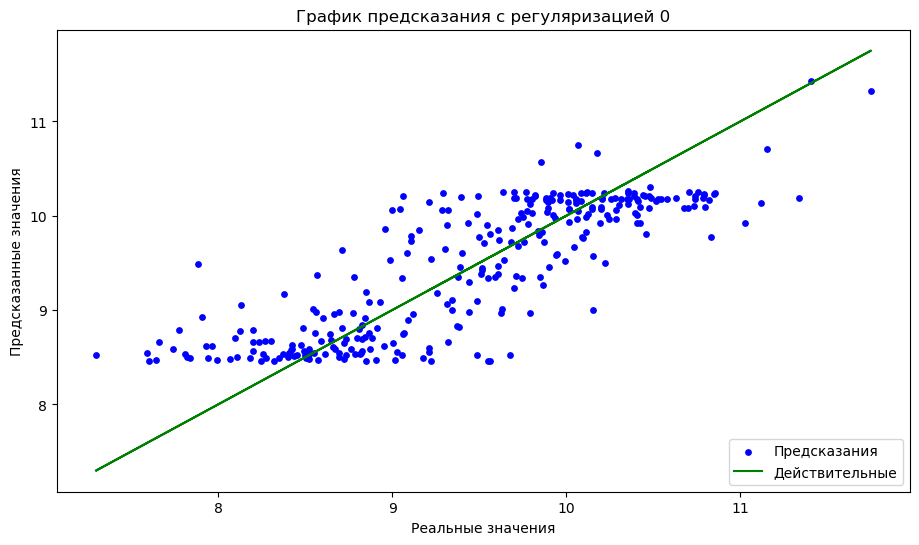

In [11]:
# Отобразим данные в виде графика (регуляризация = 0)
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6), dpi=100)

plt.scatter(y, pipeline_0.predict(X), label='Предсказания', color='blue', s = 15)
plt.plot(y, y, label='Действительные', color='green')
plt.legend(loc='lower right')
plt.title("График предсказания с регуляризацией 0")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.show()

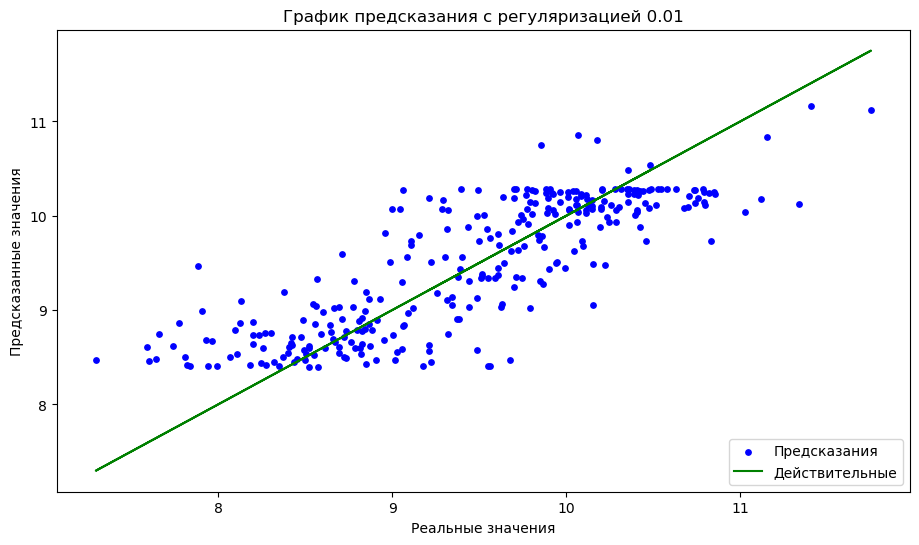

In [12]:
# Отобразим данные в виде графика (регуляризация = 0.01)
plt.figure(figsize=(11, 6), dpi=100)

plt.scatter(y, pipeline_1.predict(X), label='Предсказания', color='blue', s = 15)
plt.plot(y, y, label='Действительные', color='green')
plt.legend(loc='lower right')
plt.title("График предсказания с регуляризацией 0.01")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.show()

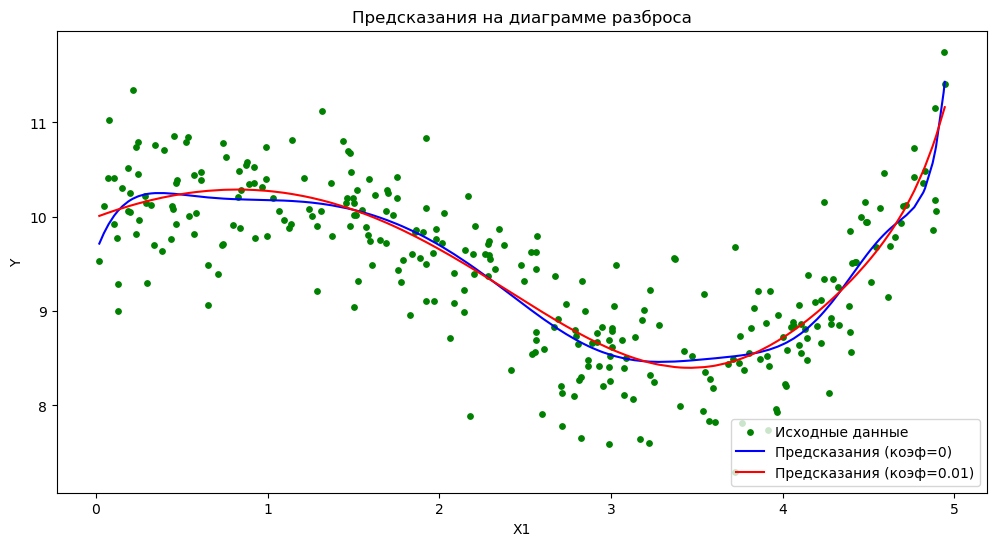

In [13]:
plt.figure(figsize=(12, 6), dpi=100)

# Строим диаграмму разброса
plt.scatter(df['X1'], df['Y'], color='green', label='Исходные данные', s = 15)

# Строим кривую
X1_sorted = df.drop('Y', axis = 1).sort_values(by = ['X1'])
plt.plot(X1_sorted['X1'].values, pipeline_0.predict(X1_sorted), label='Предсказания (коэф=0)', color='blue')
plt.plot(X1_sorted['X1'].values, pipeline_1.predict(X1_sorted), label='Предсказания (коэф=0.01)', color='red')

plt.legend(loc='lower right')
plt.title('Предсказания на диаграмме разброса')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

## Задача 2. Классификация и кросс-валидация (вариант №1)

### Замечание:

Используйте класс логистической регрессии из sklearn со следующими параметрами:
- penalty='l2'
- fit_intercept=True
- max_iter=100
- C=1e5
- solver='liblinear'
- random_state=12345

Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, random_state=0

Для выбора гиперпараметров используйте два подхода: 
1) с отложенной выборкой, 
2) с кросс-валидацией

Для кросс-валидации использовать функцию cross_validate из sklearn

Параметры разбиения для выбора гиперпараметров используйте те, что в п.4 задачи 1

Дано множество наблюдений (см. набор данных к заданию), классификатор - логистическая регрессия. 
- Найти степень полинома с минимальной ошибкой на проверочном подмножестве. 
- Для лучшего случая рассчитать ошибку на тестовом подмножестве. 
- В качестве метрики использовать долю правильных классификаций. 
- Сделать заключение о влиянии степени полинома на качество предсказания.

### Построить:
- диаграмму разброса исходных данных
- зависимость доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств (две кривые на одном графике)
- результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств с указанием границы принятия решения

In [14]:
# Подключаем библиотеки
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

import sys
sys.path.append("./lib")
from plot_utils import show_cplots

import warnings
warnings.filterwarnings("ignore")

# Создаем dataframe
df_v1 = pd.read_csv('Cl_A5_V1.csv')

# Выводим десять строк, начиная с головы
df_v1.head(10)

,X1,X2,y
0,-0.192831,-0.489801,1.0
1,-0.776832,-0.221889,0.0
2,0.244302,0.309428,1.0
3,0.599050,-0.505053,1.0
4,1.124836,1.015005,0.0
5,0.998104,0.970673,0.0
6,0.485917,0.286275,1.0
7,2.089178,-0.069146,1.0
8,0.691908,-0.686868,1.0
9,0.476896,1.565351,0.0


### Диаграмма разброса исходных данных

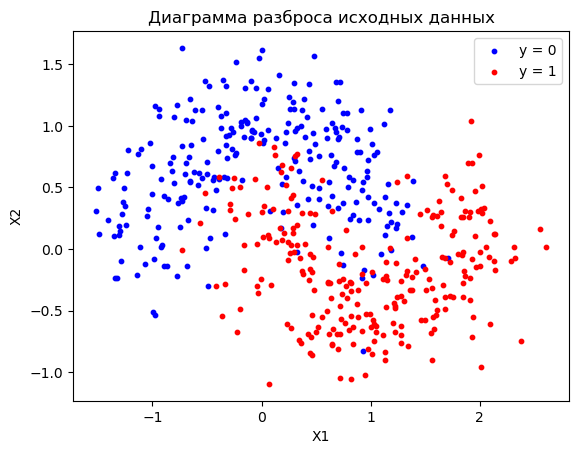

In [15]:
X = df_v1.drop('y', axis = 1).values
y = df_v1['y'].values

df_v1_0 = df_v1.query('y == 0')
df_v1_1 = df_v1.query('y == 1')

# Строим диаграмму разброса исходных данных
ax = df_v1_0.plot.scatter(x = 'X1', y = 'X2', color = 'blue', label = "y = 0", s = 10)
df_v1_1.plot.scatter(x = 'X1', y = 'X2', color = 'red', label = "y = 1", s = 10, ax = ax)
plt.title('Диаграмма разброса исходных данных')
plt.show()

In [16]:
pipeline = Pipeline([
    ("poly", PolynomialFeatures()),
    ("log_reg", 
     LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, C=1e5, solver='liblinear', random_state=12345))
])

X_train, X_test, y_train, y_test = override_train_test_split(X, y, train_size=0.7, random_state=0)

In [17]:
# Результаты обучения моделей
holdout_train_accuracy = []
holdout_test_accuracy = []

# Степени полинома
degrees = range(1, 20)

# Обучаем модели с разными степенями полиномов с отложенной выборкой
for degree in degrees:
    # Меняем степень
    pipeline.named_steps['poly'].degree = degree
    
    # Обучаем
    pipeline.fit(X_train, y_train)

    # Опредляем точность при обучении
    holdout_train_accuracy.append(accuracy_score(y_train, pipeline.predict(X_train)))
    
    # Определяем точность при test
    holdout_test_accuracy.append(accuracy_score(y_test, pipeline.predict(X_test)))

### Зависимость доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств (две кривые на одном графике)

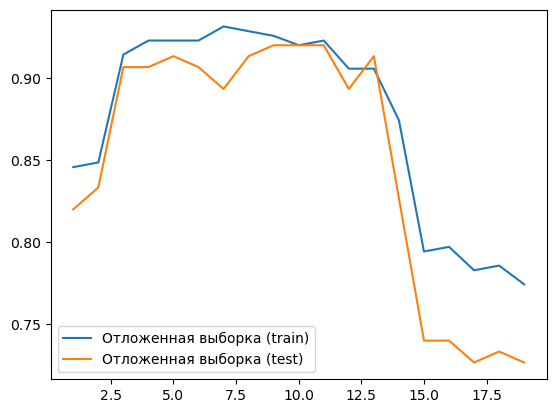

In [18]:
# Построим графики
# График точности обучения для выборки
plt.plot(degrees, holdout_train_accuracy, label='Отложенная выборка (train)')

# График точности проверки для выборки
plt.plot(degrees, holdout_test_accuracy, label='Отложенная выборка (test)')
plt.legend(loc='lower left')
plt.show()

In [19]:
crossval_train_accuracy = []
crossval_test_accuracy = []

# Обучаем модели с разными степенями полиномов c кросс-валидацией
for degree in degrees:
    # Меняем степень
    pipeline.named_steps['poly'].degree = degree
    
    # Обучение модели с кросс-валидацией
    cv_results = cross_validate(pipeline, X_train, y_train, cv=4, return_train_score=True)
    
    # Точность на обучении
    crossval_train_accuracy.append(np.mean(cv_results['train_score']))
    
    # Точность на проверочном
    crossval_test_accuracy.append(np.mean(cv_results['test_score']))

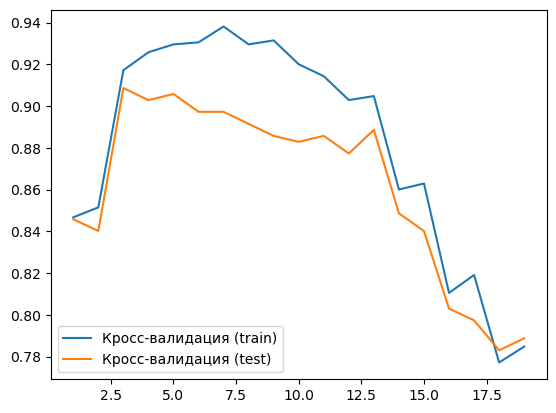

In [20]:
# Построим графики
# График точности для обучения для кросс-валидации
plt.plot(degrees, crossval_train_accuracy, label='Кросс-валидация (train)')

# График точности проверки для кросс-валидации
plt.plot(degrees, crossval_test_accuracy, label='Кросс-валидация (test)')
plt.legend(loc='lower left')
plt.show()

### Найдем степень полинома с минимальной ошибкой на проверочном подмножестве

In [21]:
# Cтепень полинома с минимальной ошибкой на проверочном подмножестве (отложенная выборка)
holdout_degree = degrees[np.argmax(holdout_test_accuracy)]
holdout_degree

9

In [22]:
# Cтепень полинома с минимальной ошибкой на проверочном подмножестве (кросс-валидация)
crossval_degree = degrees[np.argmax(crossval_test_accuracy)]
crossval_degree

3

### Для лучшего случая рассчитаем ошибку на тестовом подмножестве. В качестве метрики используем долю правильных классификаций.

In [23]:
# Обучим модель для лучшего случая степени полинома
pipeline.named_steps['poly'].degree = crossval_degree

# Cоздание объекта логической регрессии
pipeline.fit(X_train, y_train)

# Доля правильных классификаций
test_preds = pipeline.predict(X_test) 

accuracy_score(y_test, test_preds)

0.9066666666666666

### Результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств с указанием границы принятия решения

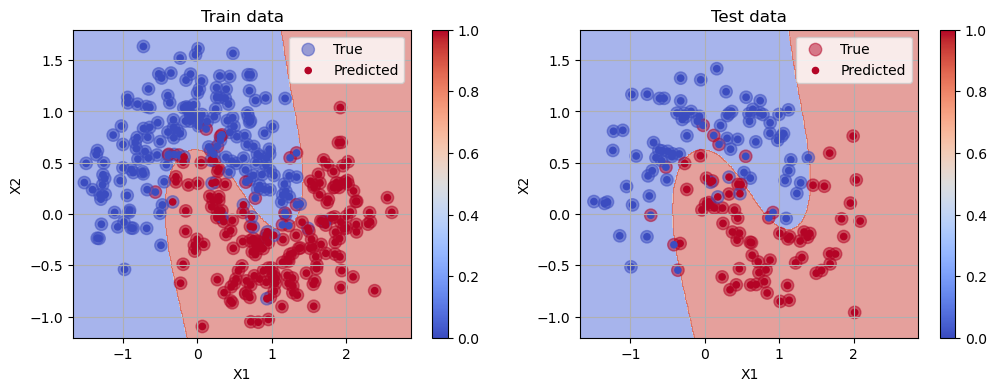

In [24]:
y_test_pred = pipeline.predict(X_test)

show_cplots(
    pipeline, 
    X_train, 
    y_train,
    X_test,
    y_test, 
    title=None, 
    cmap="coolwarm", 
    proba=False)

## Заключение о влиянии степени полинома на качество предсказания
Проанализировав графики можно сделать вывод, что чем больше степень полинома, тем меньше становится точность предсказания


## Задача 3. Классификация текстовых документов (вариант №3)

### Набор рецензий на фильмы (reviews)

1. Загрузите исходные данные
2. Разбейте исходные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)
3. Используя стратифицированную кросс-валидацию k-folds () для обучающего множество с метрикой Balanced-Accuracy, найдите лучшие гиперпараметры для следующих классификаторов:
- K-ближайших соседей: количество соседей () из диапазона np.arange(1, 150, 20)
- Логистическая регрессия: параметр регуляризации () из диапазона np.logspace(-2, 10, 8, base=10)
- Наивный Байес: сглаживающий параметр модели Бернулли () из диапазона np.logspace(-4, 1, 8, base=10)
- Наивный Байес: сглаживающий параметр полиномиальной модели () из диапазона np.logspace(-4, 1, 8, base=10)
- Отобразите кривые (параметры модели)-(Balanced-Accuracy) при обучении и проверке для каждой классификатора (две кривые на одном графике для каждого классификатора)
4. Если необходимо, выбранные модели обучите на всём обучающем подмножестве (train) и протестируйте на тестовом (test) по Balanced-Accuracy, R, P, F1. Определите время обучения и предсказания.
5. Выполните пункты 3-5 для n-gram=1, n-gram=2 и n-gram=(1,2)
6. Выведите в виде таблицы итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, метрики (Balanced-Accuracy, R, P, F1))
7. Сделайте выводы по полученным результатам (преимущества и недостатки методов)

### Замечание:
- Для всех объектов/методов/моделей random_state = 123
- Для выбора гиперпараметров можно использовать стандартные утилиты sklearn

In [25]:
import warnings
warnings.filterwarnings("ignore")

# Создание dataframe на основе tsv-файла
df = pd.read_csv('reviews.tsv', sep='\t', names=['score', 'review'])

# Выводим десять строк, начиная с головы
df.head(10)

,score,review
0,0,unless bob crane is someone of particular inte...
1,1,"finds a way to tell a simple story , perhaps t..."
2,0,"ill-considered , unholy hokum ."
3,0,"nijinsky says , 'i know how to suffer' and if ..."
4,1,the auteur's ear for the way fears and slights...
5,0,the premise for this kegger comedy probably so...
6,1,"a distant , even sterile , yet compulsively wa..."
7,1,"engrossing and affecting , if ultimately not q..."
8,0,"the tuxedo wasn't just bad ; it was , as my fr..."
9,0,nothing in waking up in reno ever inspired me ...


In [26]:
# Подключаем библиотеки
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import time

### К-ближайших соседей: количество соседей (np.arange(1, 150, 20)) из диапазона np.arange(1, 150, 20)

In [27]:
# Разбиваем исходные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)
train, test = train_test_split(df, test_size=0.2, random_state=123)

# Параметры классификатора
knn_clf = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': np.arange(1, 150, 20)}

# Метрика
scorer = make_scorer(balanced_accuracy_score)

# k-folds (k=4)
cv = StratifiedKFold(n_splits=4)

In [28]:
vectorizer11 = TfidfVectorizer(ngram_range=(1, 1))
X_train11 = vectorizer11.fit_transform(train['review'])
X_test11 = vectorizer11.transform(test['review'])

vectorizer22 = TfidfVectorizer(ngram_range=(2, 2))
X_train22 = vectorizer22.fit_transform(train['review'])
X_test22 = vectorizer22.transform(test['review'])

vectorizer12 = TfidfVectorizer(ngram_range=(1, 2))
X_train12 = vectorizer12.fit_transform(train['review'])
X_test12 = vectorizer12.transform(test['review'])

In [29]:
def show_plot(grid_search):
    
    params = list(map(lambda param: str(param), grid_search.cv_results_['params']))
    X_train = grid_search.cv_results_['mean_train_score']
    X_test = grid_search.cv_results_['mean_test_score']
    plt.plot(params, X_train, label='train')
    plt.plot(params, X_test, label='test')

    plt.xticks(rotation='vertical')
    plt.xlabel("Parameters")
    plt.ylabel("Balanced-Accuracy")
    plt.legend()
    plt.show()

In [30]:
def train_time(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    return time.time() - start_time

def prediction_time(model, X_test):
    start_time = time.time()
    predictions = model.predict(X_test)
    return time.time() - start_time 

In [31]:
def kn_classifier(X_train, X_test, value):
    
    # Лучшие гиперпараметры
    grid_search = GridSearchCV(knn_clf, knn_param_grid, scoring=scorer, cv=cv, return_train_score = True)
    grid_search.fit(X_train, train['score'])
    
    # Обучение и предсказание
    test_result_list = list()
    for i in knn_param_grid['n_neighbors']:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, train['score'])
        test_preds = model.predict(X_test)
        test_result_list.append(balanced_accuracy_score(test['score'], test_preds))

    # Лучшая модель
    best_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
    
    # Время обучения и предсказания
    train_time_result = train_time(best_model, X_train, train['score'])
    prediction_time_result = prediction_time(best_model, X_test)
    
    model.fit(X_train, train['score'])
    predictions = best_model.predict(X_test)

    show_plot(grid_search)
    
    results = ["K-Nearest Neighbors",
               value,
               grid_search.best_params_['n_neighbors'],
               balanced_accuracy_score(test['score'], predictions),
               recall_score(test['score'], predictions),
               precision_score(test['score'], predictions),
               f1_score(test['score'], predictions),
               train_time_result,
               prediction_time_result
              ]
    
    return results

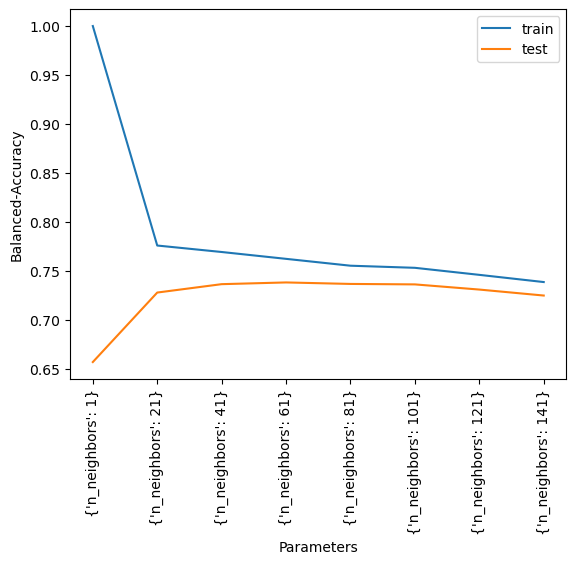

In [32]:
result_0 = kn_classifier(X_train11, X_test11, "1")

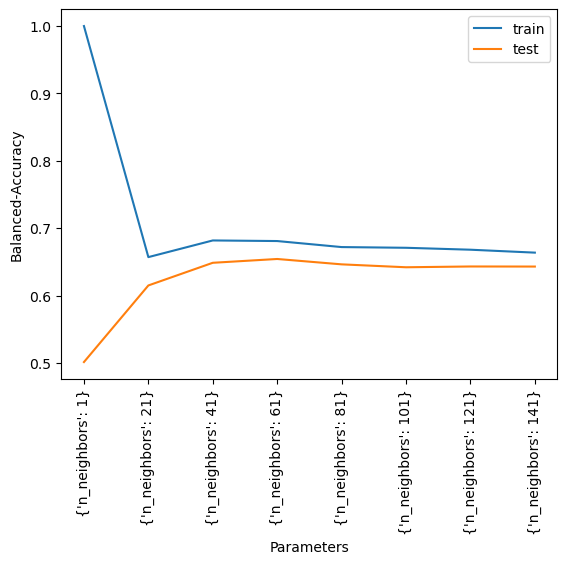

In [33]:
result_1 = kn_classifier(X_train22, X_test22, "2")

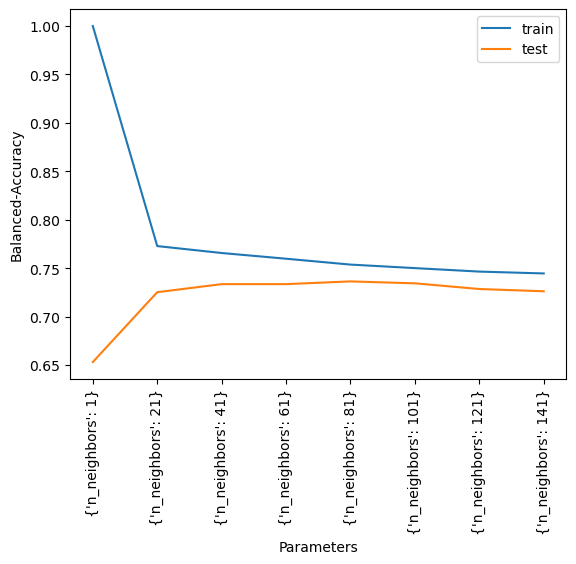

In [34]:
result_2 = kn_classifier(X_train12, X_test12, "1, 2")

### Логистическая регрессия: параметр регуляризации (C) из диапазона np.logspace(-2, 10, 8, base=10)

In [35]:
lr_clf = LogisticRegression()
lr_param_grid = {'C': np.logspace(-2, 10, 8, base=10)}

In [36]:
def lr_classifier(X_train, X_test, value):
    
    # Лучшие гиперпараметры 
    grid_search = GridSearchCV(lr_clf, lr_param_grid, scoring=scorer, cv=cv, return_train_score = True)
    grid_search.fit(X_train, train['score'])

    # Обучение и предсказание
    test_result_list = list()
    for i in lr_param_grid['C']:
        model = LogisticRegression(C=i)
        model.fit(X_train, train['score'])
        test_preds = model.predict(X_test)
        test_result_list.append(balanced_accuracy_score(test['score'], test_preds))

    # Лучшая модель
    best_model = LogisticRegression(C=grid_search.best_params_['C'])
    
    # Время обучения и предсказания
    train_time_result = train_time(best_model, X_train, train['score'])
    prediction_time_result = prediction_time(best_model, X_test)

    predictions = best_model.predict(X_test)

    show_plot(grid_search)
    
    results = ["Logistic Regression",
               value,
               grid_search.best_params_['C'],
               balanced_accuracy_score(test['score'], predictions),
               recall_score(test['score'], predictions),
               precision_score(test['score'], predictions),
               f1_score(test['score'], predictions),
               train_time_result,
               prediction_time_result
              ]
    
    return results

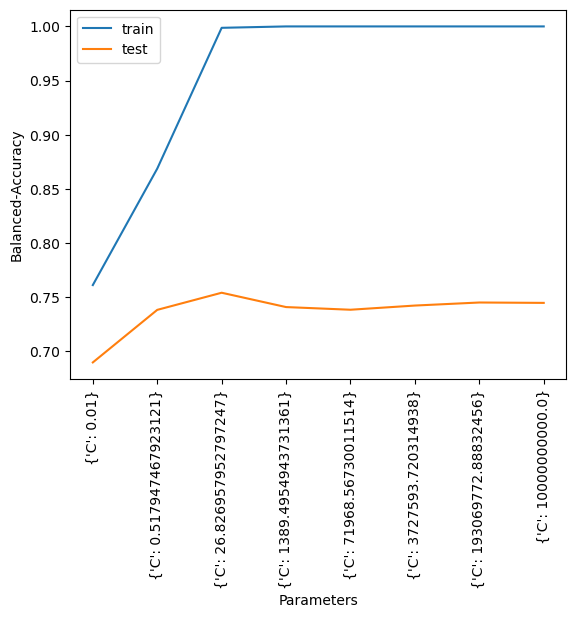

In [37]:
result_4 = lr_classifier(X_train11, X_test11, "1")

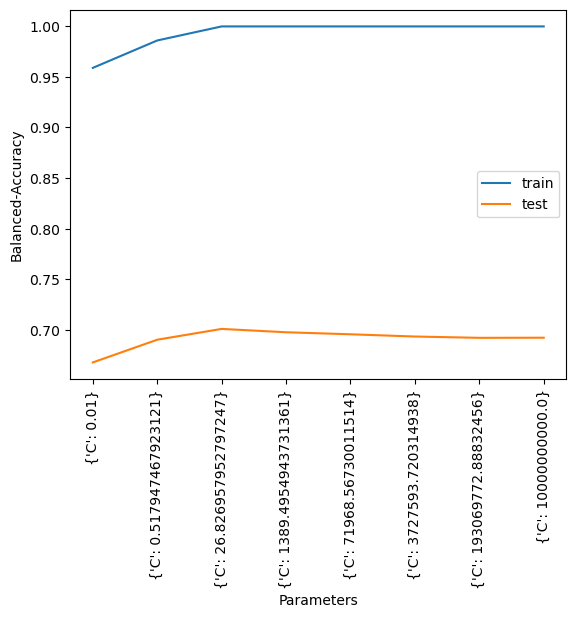

In [38]:
result_5 = lr_classifier(X_train22, X_test22, "2")

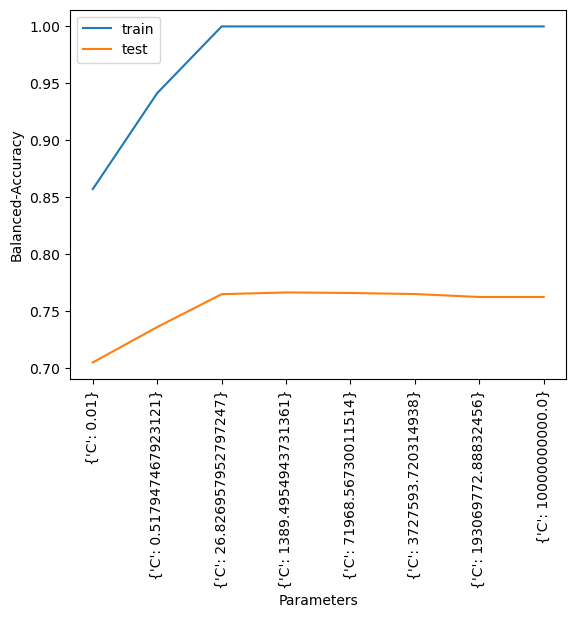

In [39]:
result_6 = lr_classifier(X_train12, X_test12, "1, 2")

### Наивный Байес: сглаживающий параметр модели Бернулли () из диапазона np.logspace(-4, 1, 8, base=10)

In [40]:
bnb_clf = BernoulliNB()
bnb_param_grid = {'alpha': np.logspace(-4, 1, 8, base=10)}

In [41]:
def bnb_classifier(X_train, X_test, value):
    
    # Лучшие гиперпараметры 
    grid_search = GridSearchCV(bnb_clf, bnb_param_grid, scoring=scorer, cv=cv, return_train_score = True)
    grid_search.fit(X_train, train['score'])

    # Обучение и предсказание
    test_result_list = list()
    for i in bnb_param_grid['alpha']:
        model = BernoulliNB(alpha=i)
        model.fit(X_train, train['score'])
        test_preds = model.predict(X_test)
        test_result_list.append(balanced_accuracy_score(test['score'], test_preds))

    # Лучшая модель
    best_model = BernoulliNB(alpha=grid_search.best_params_['alpha'])
    
    # Время обучения и предсказания
    train_time_result = train_time(best_model, X_train, train['score'])
    prediction_time_result = prediction_time(best_model, X_test)
    
    predictions = best_model.predict(X_test)

    show_plot(grid_search)
    
    results = ["BernoulliNB",
               value,
               grid_search.best_params_['alpha'],
               balanced_accuracy_score(test['score'], predictions),
               recall_score(test['score'], predictions),
               precision_score(test['score'], predictions),
               f1_score(test['score'], predictions),
               train_time_result,
               prediction_time_result
               ]
    
    return results

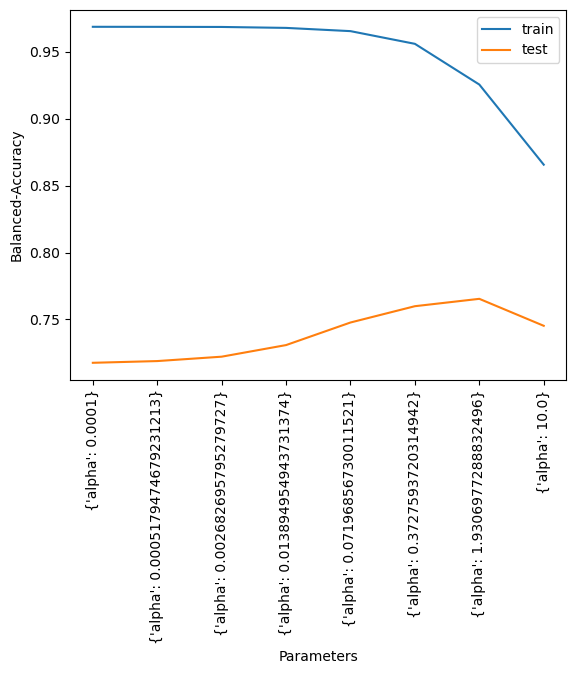

In [42]:
result_7 = bnb_classifier(X_train11, X_test11, "1")

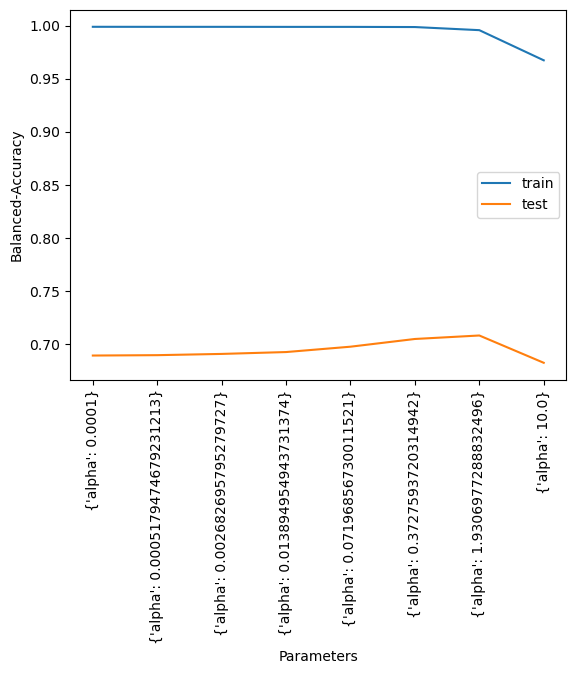

In [43]:
result_8 = bnb_classifier(X_train22, X_test22, "2")

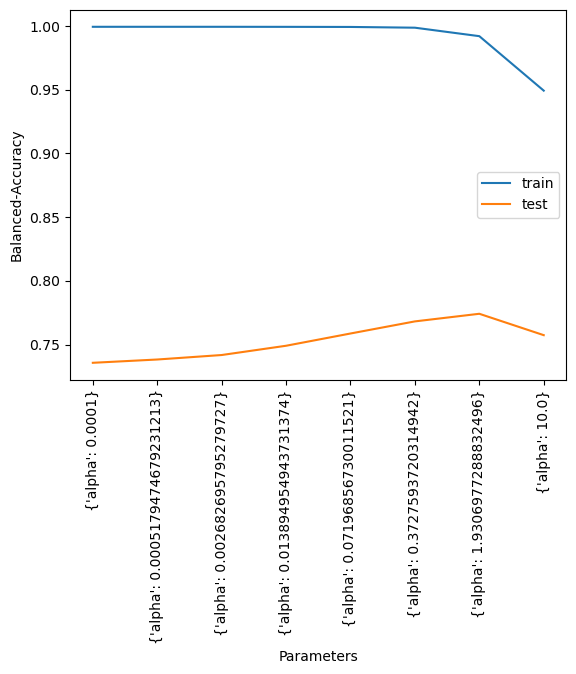

In [44]:
result_9 = bnb_classifier(X_train12, X_test12, "1, 2")

### Наивный Байес: сглаживающий параметр полиномиальной модели () из диапазона np.logspace(-4, 1, 8, base=10)

In [45]:
mnb_clf = MultinomialNB()
mnb_param_grid = {'alpha': np.logspace(-4, 1, 8, base=10)}

In [46]:
def mnb_classifier(X_train, X_test, value):
    
    # Лучшие гиперпараметры 
    grid_search = GridSearchCV(mnb_clf, mnb_param_grid, scoring=scorer, cv=cv, return_train_score = True)
    grid_search.fit(X_train, train['score'])

    # Обучение и предсказание
    test_result_list = list()
    for i in mnb_param_grid['alpha']:
        model = MultinomialNB(alpha=i)
        model.fit(X_train, train['score'])
        test_preds = model.predict(X_test)
        test_result_list.append(balanced_accuracy_score(test['score'], test_preds))

    # Лучшая модель
    best_model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
    
    # Время обучения и предсказания
    train_time_result = train_time(best_model, X_train, train['score'])
    prediction_time_result = prediction_time(best_model, X_test)
    
    predictions = best_model.predict(X_test)

    show_plot(grid_search)
    
    results = ["MultinomialNB", 
               value, grid_search.best_params_['alpha'], 
               balanced_accuracy_score(test['score'], predictions),
               recall_score(test['score'], predictions),
               precision_score(test['score'], predictions),
               f1_score(test['score'], predictions),
               train_time_result,
               prediction_time_result
              ]
    
    return results

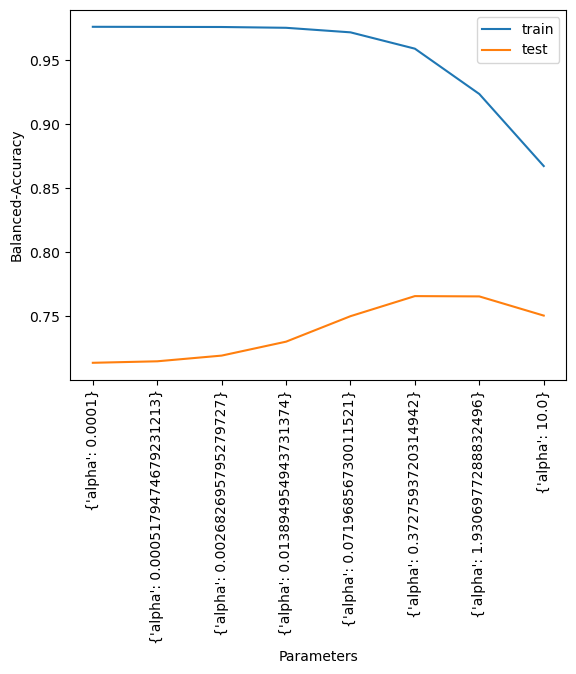

In [47]:
result_10 = mnb_classifier(X_train11, X_test11, "1")

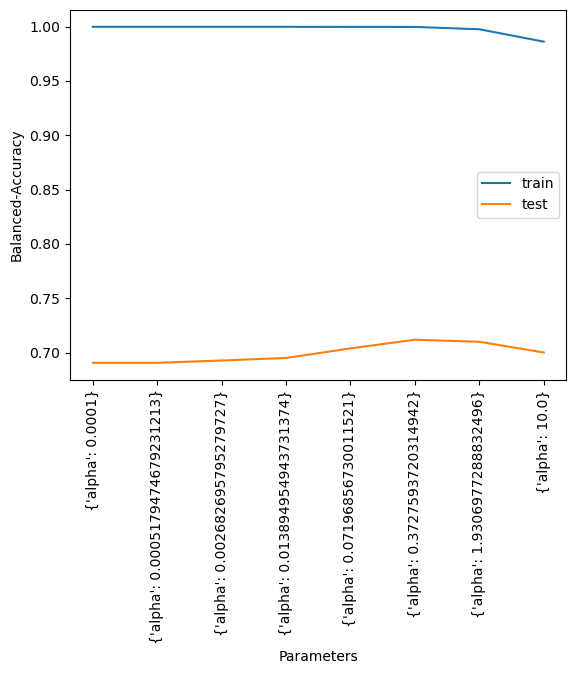

In [48]:
result_11 = mnb_classifier(X_train22, X_test22, "2")

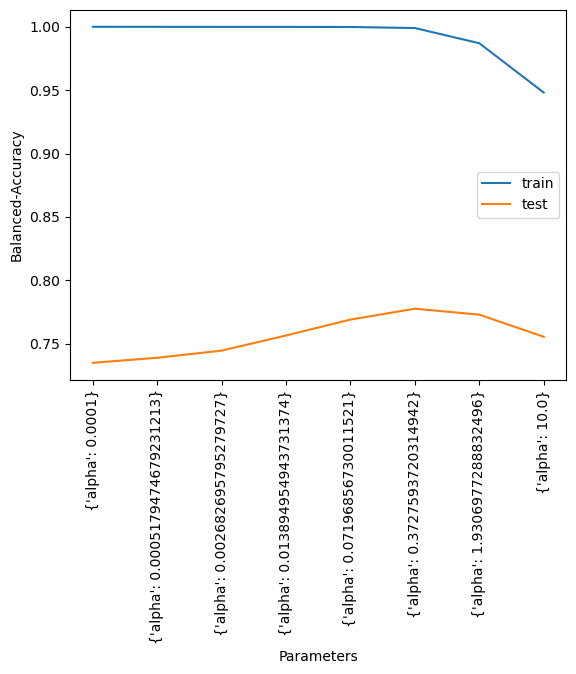

In [49]:
result_12 = mnb_classifier(X_train12, X_test12, "1, 2")

### Результаты

In [52]:
df_results = pd.DataFrame([result_0, result_1, result_2, result_4, 
                           result_5, result_6, result_7, result_8, 
                           result_9, result_10, result_11, result_12],
                         columns = [
                            'Модель', 'n-gram', 'Параметры', 'Balanced Accuracy', 
                            'Recall', 'Precision', 'F1-score','Время обучения',
                            'Время предсказания'
                         ])
df_results

,Модель,n-gram,Параметры,Balanced Accuracy,Recall,Precision,F1-score,Время обучения,Время предсказания
0,K-Nearest Neighbors,1,61.000000,0.757571,0.791199,0.741879,0.765745,0.000696,0.764350
1,K-Nearest Neighbors,2,61.000000,0.668247,0.544944,0.723881,0.621795,0.000896,0.383429
2,K-Nearest Neighbors,"1, 2",81.000000,0.759496,0.757491,0.761054,0.759268,0.001005,2.176150
3,Logistic Regression,1,26.826958,0.767923,0.774345,0.765032,0.769660,0.226758,0.000121
4,Logistic Regression,2,26.826958,0.714932,0.731273,0.708711,0.719816,0.639284,0.000134
5,Logistic Regression,"1, 2",1389.495494,0.800241,0.828652,0.784574,0.806011,0.966716,0.000181
6,BernoulliNB,1,1.930698,0.782942,0.778090,0.786187,0.782118,0.001869,0.000662
7,BernoulliNB,2,1.930698,0.723872,0.717228,0.727445,0.722301,0.002753,0.001881
8,BernoulliNB,"1, 2",1.930698,0.791849,0.787453,0.794896,0.791157,0.003596,0.002740
9,MultinomialNB,1,0.372759,0.776379,0.770599,0.780095,0.775318,0.001441,0.000248


### Выводы по полученным результатам (преимущества и недостатки методов)

#### К-ближайших соседей:
 - время обучения моделей меньше, чем у других методов
 - время предсказания больше, чем у других методов

Т.е. быстрое обучение, но долгое предсказание

#### Логистическая регрессия:
 - время обучения больше, чем у других методов
 - время предсказания меньше, чем у других методов
 
Т.е. быстрое предсказание, но долгое обучение

#### Наивный Байес: сглаживающий параметр модели Бернулли и полиномиальной модели:
 - время обучения меньше
 - время предсказания меньше

Т.е. cкорость обучения и предсказания быстрее в сравнении с другими методами